In [1]:
# Importar las librerías a utilizar
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import matplotlib.pylab as plt
import numpy as np
from sklearn import metrics

In [4]:
# Leer los datos a analizar
smoke = pd.read_csv("Child smokers.csv", na_values = ' ')
print('shape: ', smoke.shape)
smoke.head() 
smoke.tail()

shape:  (654, 5)


,Age (years),Height (cm),FEV (litres),Sex,Smoker
649,15,152,2.278,female,smoker
650,16,183,4.872,male,smoker
651,16,170,4.270,male,smoker
652,15,173,3.727,male,smoker
653,16,160,2.795,female,smoker


In [6]:
# Convertir valores categoricos a numéricos
smoke['Sex'] = smoke['Sex'].astype('category').cat.codes
smoke['Smoker'] = smoke['Smoker'].astype('category').cat.codes
smoke

,Age (years),Height (cm),FEV (litres),Sex,Smoker
0,9,145,1.708,0,0
1,8,171,1.724,0,0
2,7,138,1.720,0,0
3,9,135,1.558,1,0
4,9,145,1.895,1,0
...,...,...,...,...,...
649,15,152,2.278,0,1
650,16,183,4.872,1,1
651,16,170,4.270,1,1
652,15,173,3.727,1,1


In [7]:
#Convertimos las filas vacia a tipo NaN
popNaN = smoke.dropna()

popNaN

,Age (years),Height (cm),FEV (litres),Sex,Smoker
0,9,145,1.708,0,0
1,8,171,1.724,0,0
2,7,138,1.720,0,0
3,9,135,1.558,1,0
4,9,145,1.895,1,0
...,...,...,...,...,...
649,15,152,2.278,0,1
650,16,183,4.872,1,1
651,16,170,4.270,1,1
652,15,173,3.727,1,1


In [8]:
print ("Min en Age (years):", smoke['Age (years)'].min())
print ("Min en Height (cm):", smoke['Height (cm)'].min())
print ("Min en FEV (litres):", smoke['FEV (litres)'].min())
print ("MIN en Sex:", smoke['Sex'].min())
print ("MIN en Smoker:", smoke['Smoker'].min())

Min en Age (years): 3
Min en Height (cm): 117
Min en FEV (litres): 0.7909999999999999
MIN en Sex: 0
MIN en Smoker: 0


<AxesSubplot:>

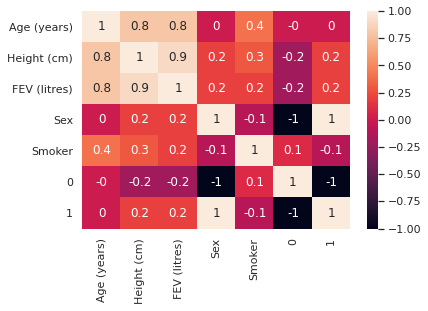

In [20]:
# Matriz de correlación reducida en características
corrmat = smoke.corr().round(1)
# Se usa la matriz de correlación para dibujar un mapa de calor
sns.heatmap(data=corrmat, annot=True)

/home/guillermo/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


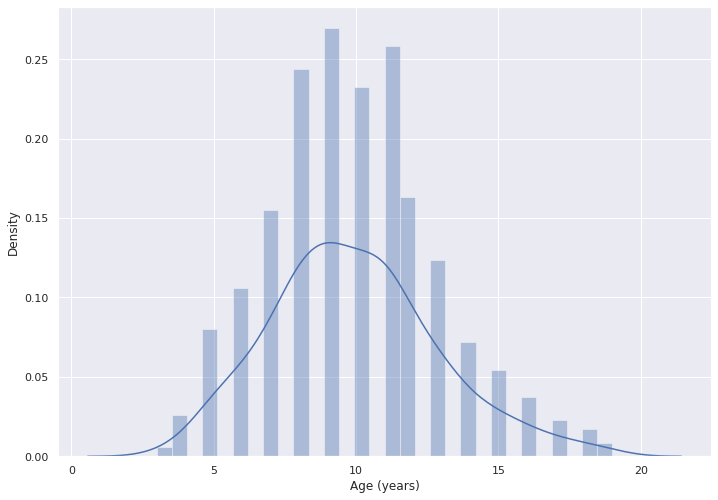

In [22]:
# Se utiliza displot de la librería seaborn para
# un análisis preliminar
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(smoke['Age (years)'], bins=30)
plt.show()

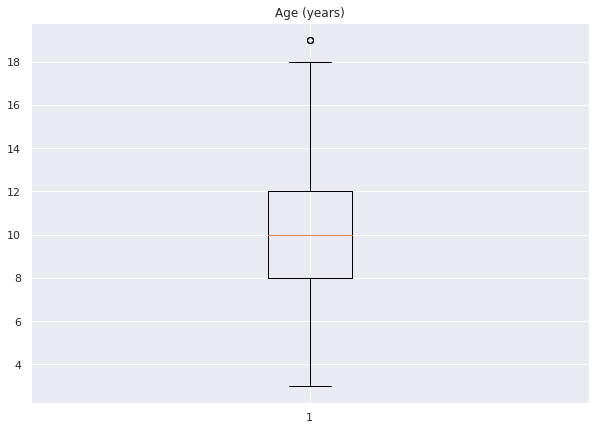

In [23]:
fig = plt.figure(figsize=(10, 7))
plt.boxplot(smoke['Age (years)'])
plt.title('Age (years)')
plt.show()

In [27]:
smokeOff = smoke

smokeOff = smokeOff.drop(columns=['Height (cm)', 'FEV (litres)'])
smokeOff

,Age (years),Sex,Smoker,0,1
0,9,0,0,1.0,0.0
1,8,0,0,1.0,0.0
2,7,0,0,1.0,0.0
3,9,1,0,0.0,1.0
4,9,1,0,0.0,1.0
...,...,...,...,...,...
649,15,0,1,1.0,0.0
650,16,1,1,0.0,1.0
651,16,1,1,0.0,1.0
652,15,1,1,0.0,1.0


In [28]:
# Función que recibe un DataFrame, una proporción y el nombre de la clase,
# y genera cuatro conjuntos de datos para entrenamiento
# y pruebas del algoritmo de aprendizaje
from sklearn.model_selection import train_test_split

def split_label(pace, test_size, label):
    train, test = train_test_split(smokeOff, test_size=test_size)
    features = smokeOff.columns.drop(label)
    train_X = train[features]
    train_Y = train[label]
    test_X = test[features]
    test_Y = test[label]
    return train_X, train_Y, test_X, test_Y

In [29]:
# Dividir el conjunto de datos 
train_X, train_Y, test_X, test_Y = split_label(smokeOff, 0.2, 'Smoker')

In [30]:
# Aplicar one hot encoding a la columna 
from sklearn.preprocessing import OneHotEncoder

one = OneHotEncoder(handle_unknown='ignore')

result = one.fit_transform(train_X['Sex'].values.reshape(-1,1)).toarray()
train_X_1 = train_X
train_X_1[['0', '1']] = pd.DataFrame(result, index = train_X_1.index)
train_X_1

,Age (years),Sex,0,1
293,9,1,0.0,1.0
103,4,1,0.0,1.0
376,10,1,0.0,1.0
347,13,1,0.0,1.0
518,12,1,0.0,1.0
...,...,...,...,...
422,12,0,1.0,0.0
292,8,1,0.0,1.0
211,9,0,1.0,0.0
179,9,0,1.0,0.0


In [31]:
# Aplicar escalamiento [0,1] a todos los valores
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
train_X_2 = min_max.fit_transform(train_X_1.values)
train_X_2 = pd.DataFrame(train_X_2, columns=train_X_1.columns)
train_X_2

,Age (years),Sex,0,1
0,0.3750,1.0,0.0,1.0
1,0.0625,1.0,0.0,1.0
2,0.4375,1.0,0.0,1.0
3,0.6250,1.0,0.0,1.0
4,0.5625,1.0,0.0,1.0
...,...,...,...,...
518,0.5625,0.0,1.0,0.0
519,0.3125,1.0,0.0,1.0
520,0.3750,0.0,1.0,0.0
521,0.3750,0.0,1.0,0.0


In [32]:
# Transformación del DataFrame original

result = one.fit_transform(smokeOff['Sex'].values.reshape(-1,1)).toarray()
smoke_1 = smokeOff
smoke_1[['0', '1']] = pd.DataFrame(result, index = smoke_1.index)
smoke_2 = min_max.fit_transform(smoke_1.values)
smoke_2 = pd.DataFrame(smoke_2, columns = smoke_1.columns) 
smoke_2

,Age (years),Sex,Smoker,0,1
0,0.3750,0.0,0.0,1.0,0.0
1,0.3125,0.0,0.0,1.0,0.0
2,0.2500,0.0,0.0,1.0,0.0
3,0.3750,1.0,0.0,0.0,1.0
4,0.3750,1.0,0.0,0.0,1.0
...,...,...,...,...,...
649,0.7500,0.0,1.0,1.0,0.0
650,0.8125,1.0,1.0,0.0,1.0
651,0.8125,1.0,1.0,0.0,1.0
652,0.7500,1.0,1.0,0.0,1.0


In [33]:
# Uso de clasificación por KMeans
from sklearn.cluster import KMeans
clu = KMeans(n_clusters = 3)
clu.fit(smoke_2)
clu.cluster_centers_

array([[ 3.97849462e-01,  1.11022302e-15,  2.63677968e-16,
         1.00000000e+00,  1.11022302e-15],
       [ 4.38430060e-01,  1.00000000e+00,  7.73809524e-02,
        -1.05471187e-15,  1.00000000e+00],
       [ 6.41025641e-01,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00]])